Loaded 46 raw frames of size, 192 x 1168 (lines x samples)
(46,)
[819 819 704 ...  36  19  19]


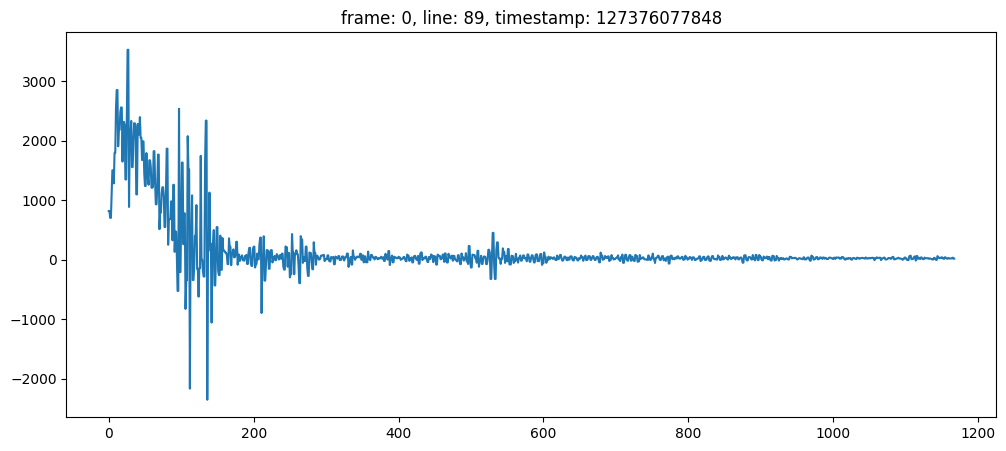

In [31]:
# data is a 3d array 
# 192 x 1168 (lines x samples) (192, 1168, 46) 46 is the number of frames


import numpy as np
import sys
from scipy.signal import hilbert
import matplotlib.pyplot as plt
libPath = "../../common/python"
if not libPath in sys.path: sys.path.append(libPath)
import rdataread as rd

# locate the path and filename
path = "../data/carotid/"
filename = "test_rf.raw"

# reading header information and RF data
hdr, timestamps, data = rd.read_rf(path + filename)
print(timestamps.shape)
numframes = 1 #hdr['frames']

# covnert RF to B 
bdata = np.zeros((hdr['lines'], hdr['samples'], hdr['frames']), dtype='float')
for frame in range(numframes):
    bdata[:,:,frame] = 20 * np.log10( np.abs(1 + hilbert(data[:,:,frame])) )

for frame in range(numframes):
    plt.figure(figsize=(12,5))
    plt.plot(data[89,:,frame])
    print(np.transpose(data[89,:,frame]))
    plt.title(f"frame: {frame}, line: 89, timestamp: {timestamps[frame]}")
    

# Data viewer

The following script reads and displays different Clarius data types.

## Reading RF data

The following script reads rf data from a file and displays it along with a sample generated b mode image.


Loaded 46 raw frames of size, 192 x 1168 (lines x samples)
(46,)
[[ 922  922 -122 ...   20    8   14]
 [1364 1093 1093 ...    6    6   13]
 [ 978  978  492 ...    9   11   11]
 ...
 [ -67  -67  515 ...   14   10   32]
 [ -93   -5   -5 ...   22   22    9]
 [  47   47  230 ...   21   14   14]]


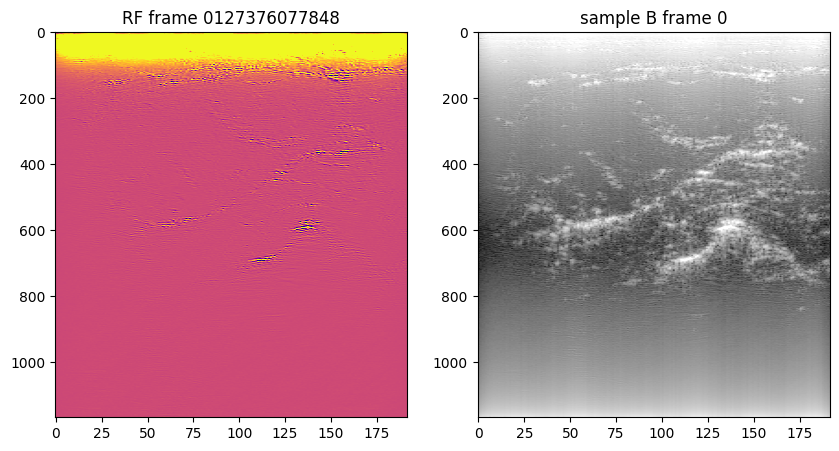

[[ 921  921 -108 ...   27   12   18]
 [1339 1105 1105 ...   11   11    6]
 [1007 1007  442 ...   19   21   21]
 ...
 [ -66  -66  492 ...   18   27   22]
 [ -90  -10  -10 ...    5    5    4]
 [  35   35  227 ...    8   17   17]]


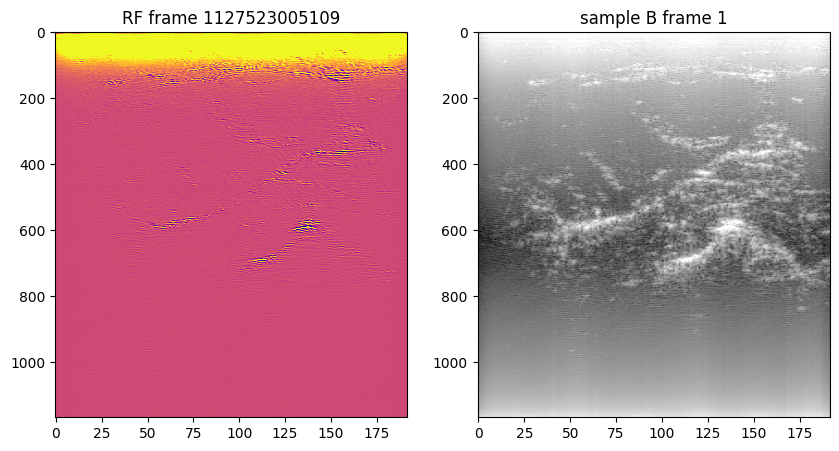

In [10]:
# data is a 3d array 
# 192 x 1168 (lines x samples) (192, 1168, 46) 46 is the number of frames


import numpy as np
import sys
from scipy.signal import hilbert
import matplotlib.pyplot as plt
libPath = "../../common/python"
if not libPath in sys.path: sys.path.append(libPath)
import rdataread as rd

# locate the path and filename
path = "../data/carotid/"
filename = "test_rf.raw"

# reading header information and RF data
hdr, timestamps, data = rd.read_rf(path + filename)
print(timestamps.shape)
numframes = 2 #hdr['frames']

# covnert RF to B 
bdata = np.zeros((hdr['lines'], hdr['samples'], hdr['frames']), dtype='float')
for frame in range(numframes):
    bdata[:,:,frame] = 20 * np.log10( np.abs(1 + hilbert(data[:,:,frame])) )

# display images
for frame in range(numframes):
    print(data[:,:,frame])
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(np.transpose(data[:,:,frame]), cmap=plt.cm.plasma, aspect='auto', vmin=-1000, vmax=1000 )
    plt.title('RF frame ' + str(frame) + str(timestamps[frame]))
    plt.subplot(1,2,2)
    plt.imshow(np.transpose(bdata[:,:,frame]), cmap=plt.cm.gray, aspect='auto', vmin=15, vmax=70 )
    plt.title('sample B frame ' + str(frame))
    plt.show()
    

Loaded 13 raw frames of size, 192 x 3120 (lines x samples)


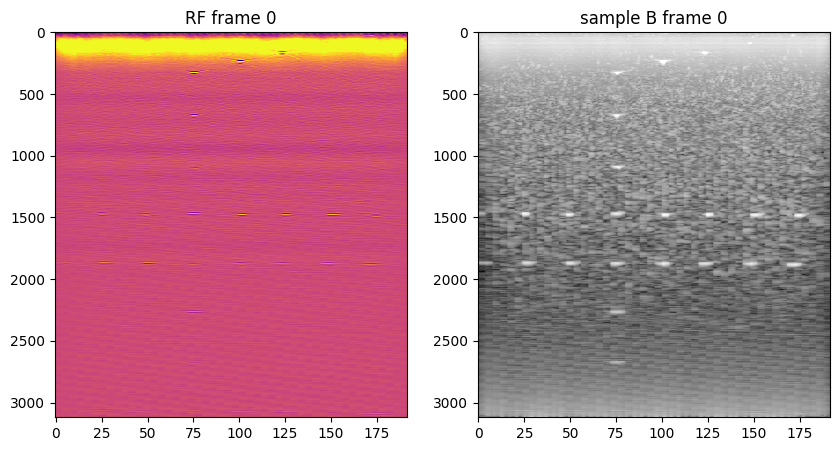

In [33]:
import numpy as np
import sys
from scipy.signal import hilbert
import matplotlib.pyplot as plt
libPath = "../../common/python"
if not libPath in sys.path: sys.path.append(libPath)
import rdataread as rd

# locate the path and filename
path = "../data/wirephantom/"
filename = "phantom_rf.raw"

# reading header information and RF data
hdr, timestamps, data = rd.read_rf(path + filename)
numframes = 1 #hdr['frames']

# covnert RF to B 
bdata = np.zeros((hdr['lines'], hdr['samples'], hdr['frames']), dtype='float')
for frame in range(numframes):
    bdata[:,:,frame] = 20 * np.log10( np.abs(1 + hilbert(data[:,:,frame])) )

# display images
for frame in range(numframes):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(np.transpose(data[:,:,frame]), cmap=plt.cm.plasma, aspect='auto', vmin=-1000, vmax=1000 )
    plt.title('RF frame ' + str(frame))
    plt.subplot(1,2,2)
    plt.imshow(np.transpose(bdata[:,:,frame]), cmap=plt.cm.gray, aspect='auto', vmin=15, vmax=70 )
    plt.title('sample B frame ' + str(frame))
    plt.show()

## Reading IQ data

The following script reads sample IQ data from a file and displays the results along with sample b mode image.

In [3]:
# read iq data
path = "../data/wirephantom/"
filename = "phantom_iq.raw"
hdr, timestamps, data = rd.read_iq(path + filename)
# separating i and q data
idata = data[:,0::2,:]
qdata = data[:,1::2,:]    

# covnert IQ to B 
numframes = 1 #hdr['frames']
bdata = np.zeros((hdr['lines'], hdr['samples'], hdr['frames']), dtype='float')
for frame in range(numframes):
    bdata[:,:,frame] = 10 * np.log10(1 + np.power(idata[:,:,frame], 2) + np.power( qdata[:,:,frame], 2)  )

# display images
for frame in range(numframes):
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.imshow(np.transpose(idata[:,:,frame]), cmap=plt.cm.viridis, aspect='auto', vmin=-100, vmax=100 )
    plt.title('I frame ' + str(frame))
    plt.subplot(1,3,2)
    plt.imshow(np.transpose(qdata[:,:,frame]), cmap=plt.cm.viridis, aspect='auto', vmin=-100, vmax=100 )
    plt.title('Q frame ' + str(frame))
    plt.subplot(1,3,3)
    plt.imshow(np.transpose(bdata[:,:,frame]), cmap=plt.cm.gray, aspect='auto', vmin=15, vmax=70 )
    plt.title('sample B frame ' + str(frame))
    plt.show()
    

NameError: name 'rd' is not defined

## Reading envelope data

The following script reads sample B/envelope data from a file and store them into memory.


Loaded 16 raw frames of size, 384 x 784 (lines x samples)


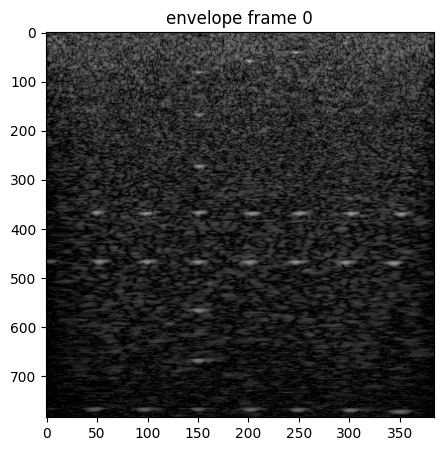

In [3]:
# read b/envelope data
path = "../data/wirephantom/"
filename = "phantom_env.raw"
hdr, timestamps, data = rd.read_env(path + filename)

# display b data
numframes = 1 #hdr['frames']
for frame in range(numframes):
    plt.figure(figsize=(5,5))
    plt.imshow(np.transpose(data[:,:,frame]), cmap=plt.cm.gray, aspect='auto', vmin=0, vmax=255 )
    plt.title('envelope frame ' + str(frame))
    plt.show()   
